# Final Project

In [1]:
# link for data in case I need it:
# https://github.com/fmspecial/Stroke_Prediction/blob/master/Stroke_dataset.csv

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import LabelEncoder



2025-07-24 18:30:46.220684: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-07-24 18:30:46.222080: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-07-24 18:30:46.227466: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-07-24 18:30:46.239485: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1753407046.259440  781507 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1753407046.26

In [2]:
df = pd.read_csv('data/healthcare-dataset-stroke-data.csv')

from sklearn.preprocessing import LabelEncoder
import joblib

le_gender = LabelEncoder()
df['gender_encoded'] = le_gender.fit_transform(df['gender'])

le_ever_married = LabelEncoder()
df['ever_married_encoded'] = le_ever_married.fit_transform(df['ever_married'])

le_work_type = LabelEncoder()
df['work_type_encoded'] = le_work_type.fit_transform(df['work_type'])

le_Residence_type = LabelEncoder()
df['Residence_type_encoded'] = le_Residence_type.fit_transform(df['Residence_type'])

le_smoking_status = LabelEncoder()
df['smoking_status_encoded'] = le_smoking_status.fit_transform(df['smoking_status'])

# Now save each encoder
joblib.dump(le_gender, 'le_gender.pkl')
joblib.dump(le_ever_married, 'le_ever_married.pkl')
joblib.dump(le_work_type, 'le_work_type.pkl')
joblib.dump(le_Residence_type, 'le_Residence_type.pkl')
joblib.dump(le_smoking_status, 'le_smoking_status.pkl')

['le_smoking_status.pkl']

In [3]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,gender_encoded,ever_married_encoded,work_type_encoded,Residence_type_encoded,smoking_status_encoded
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,1,1,2,1,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1,0,1,3,0,2
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,1,1,2,0,2
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,0,1,2,1,3
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,0,1,3,0,2


In [4]:
df.dtypes

id                          int64
gender                     object
age                       float64
hypertension                int64
heart_disease               int64
ever_married               object
work_type                  object
Residence_type             object
avg_glucose_level         float64
bmi                       float64
smoking_status             object
stroke                      int64
gender_encoded              int64
ever_married_encoded        int64
work_type_encoded           int64
Residence_type_encoded      int64
smoking_status_encoded      int64
dtype: object

In [5]:
# check for null values
print("Null values in each column:")
df.isnull().sum()

Null values in each column:


id                          0
gender                      0
age                         0
hypertension                0
heart_disease               0
ever_married                0
work_type                   0
Residence_type              0
avg_glucose_level           0
bmi                       201
smoking_status              0
stroke                      0
gender_encoded              0
ever_married_encoded        0
work_type_encoded           0
Residence_type_encoded      0
smoking_status_encoded      0
dtype: int64

In [6]:
# Fill the 201 null values in the 'bmi' column
df = df.fillna(df['bmi'].mean())

#check again for null values
df.isnull().sum()

id                        0
gender                    0
age                       0
hypertension              0
heart_disease             0
ever_married              0
work_type                 0
Residence_type            0
avg_glucose_level         0
bmi                       0
smoking_status            0
stroke                    0
gender_encoded            0
ever_married_encoded      0
work_type_encoded         0
Residence_type_encoded    0
smoking_status_encoded    0
dtype: int64

In [7]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,gender_encoded,ever_married_encoded,work_type_encoded,Residence_type_encoded,smoking_status_encoded
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1,1,1,2,1,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1,0,1,3,0,2
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1,1,1,2,0,2
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1,0,1,2,1,3
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1,0,1,3,0,2


In [8]:
df = df.drop(columns=['id', 'gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'])

# the new dataframe
df.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_encoded,ever_married_encoded,work_type_encoded,Residence_type_encoded,smoking_status_encoded
0,67.0,0,1,228.69,36.600000,1,1,1,2,1,1
1,61.0,0,0,202.21,28.893237,1,0,1,3,0,2
2,80.0,0,1,105.92,32.500000,1,1,1,2,0,2
3,49.0,0,0,171.23,34.400000,1,0,1,2,1,3
4,79.0,1,0,174.12,24.000000,1,0,1,3,0,2


In [9]:
# split the data into test and train sets
from sklearn.model_selection import train_test_split

X = df.drop(columns=['stroke'])
y = df['stroke']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)
class_weight_dict = {0: class_weights[0], 1: class_weights[1]}

model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dropout(0.1),  # Dropout layer (10% dropout)
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

2025-07-24 18:30:50.673226: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [11]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [12]:
model.evaluate(x_train, y_train)

128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0480 - loss: 31.5130


[31.268280029296875, 0.04574364051222801]

In [13]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
losses = model.fit(
    x_train, y_train,
    batch_size=16,
    epochs=25,
    validation_split=0.2,
    callbacks=[callback],
    class_weight=class_weight_dict
)

Epoch 1/25
205/205 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.2581 - loss: 6.3221 - val_accuracy: 0.3105 - val_loss: 1.3043
Epoch 2/25
205/205 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.4287 - loss: 2.3602 - val_accuracy: 0.8680 - val_loss: 0.4571
Epoch 3/25
205/205 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5376 - loss: 1.3527 - val_accuracy: 0.6699 - val_loss: 0.5932
Epoch 4/25
205/205 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6033 - loss: 0.9132 - val_accuracy: 0.3313 - val_loss: 1.0210
Epoch 5/25
205/205 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5026 - loss: 0.8535 - val_accuracy: 0.7555 - val_loss: 0.4407
Epoch 6/25
205/205 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6554 - loss: 0.6949 - val_accuracy: 0.5391 - val_loss: 0.6993
Epoch 7/25
205/205 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5835 - loss: 0.6524 - val_accuracy: 0.6112 - val_loss: 0.5847
Epoch 8/25
205/205 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6251 - loss: 0.6135 - val_accuracy: 0.

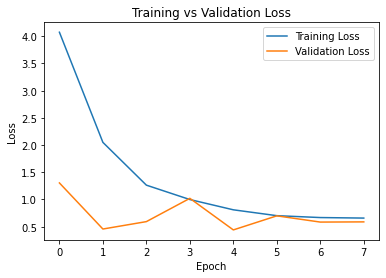

In [14]:
# filepath: /Users/torstenspieler/Desktop/Python/neural_networks/project/project.ipynb
import matplotlib.pyplot as plt

plt.plot(losses.history['loss'], label='Training Loss')
plt.plot(losses.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.show()

In [15]:
# save the model

model.save('stroke_model.keras')

In [16]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7308 - loss: 0.4553
Test Loss: 0.4526
Test Accuracy: 0.7358


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


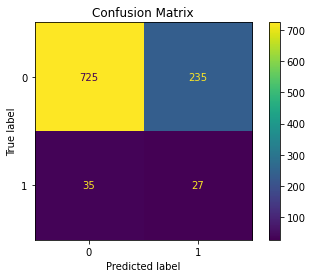

In [17]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = (model.predict(x_test) > 0.5).astype("int32")
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix")
plt.show()

In [18]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.76      0.84       960
           1       0.10      0.44      0.17        62

    accuracy                           0.74      1022
   macro avg       0.53      0.60      0.50      1022
weighted avg       0.90      0.74      0.80      1022

